In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

## Data Cleaning Level 2

### Date Cleaning Example

The number of customers that visited a Starbucks store from 2020-10-01 to 2020-11-24 is recorded per hour. The store opens at 8 am and closes at 5 pm every day of the week. Investigate to see if there are erroneous values in the data.

In [2]:
df = pd.read_excel('CustomerEnteries.xlsx')
df

,Date,Time,N_Cusotmers
0,2020-10-01,9,4
1,2020-10-01,10,7
2,2020-10-01,11,9
3,2020-10-01,12,13
4,2020-10-01,13,11
...,...,...,...
490,2020-11-24,13,9
491,2020-11-24,14,8
492,2020-11-24,15,7
493,2020-11-24,16,5


In [3]:
df.N_Cusotmers.describe()

count    495.000000
mean       7.254545
std        3.983246
min        0.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       40.000000
Name: N_Cusotmers, dtype: float64

<AxesSubplot:>

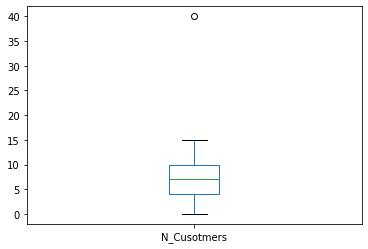

In [4]:
df.N_Cusotmers.plot(kind='box')

<AxesSubplot:>

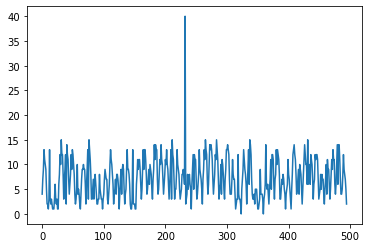

In [5]:
df.N_Cusotmers.plot()

That specifc entery seems to be erronous. 

In [6]:
df[df.N_Cusotmers>30]

,Date,Time,N_Cusotmers
232,2020-10-26,16,40


After investiagion it was obvious that nothing out of ordinary had happened on 20-10-26, therefore that entery must be made by mistake.

In [13]:
err_index = df[df.N_Cusotmers==40].index
df.at[err_index,'N_Cusotmers']=np.nan

NameError: name 'day_df' is not defined

<AxesSubplot:>

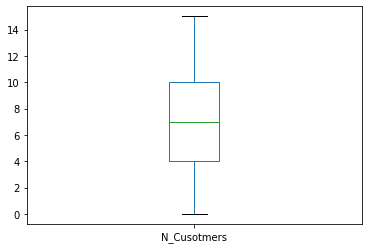

In [8]:
df.N_Cusotmers.plot(kind='box')

Let's look a bit closer

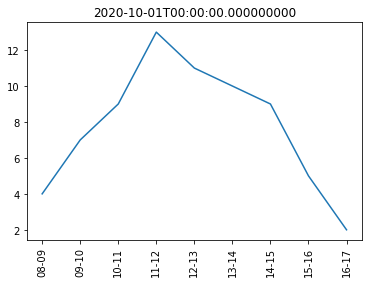

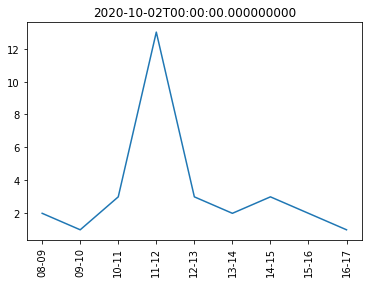

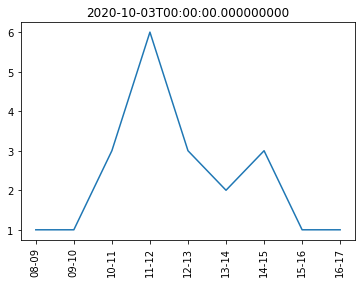

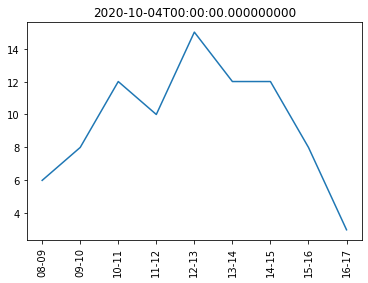

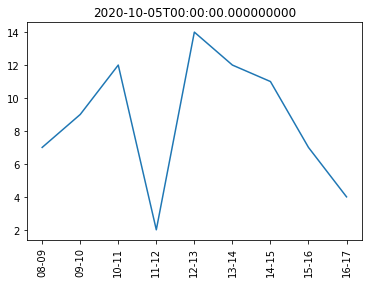

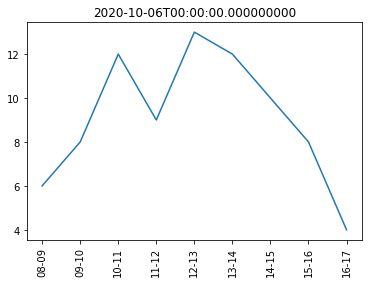

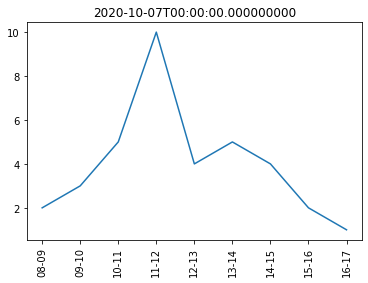

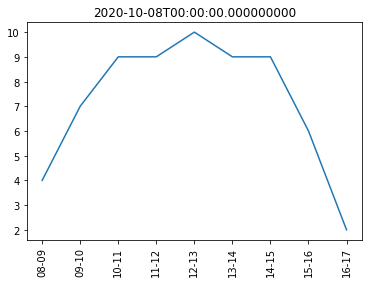

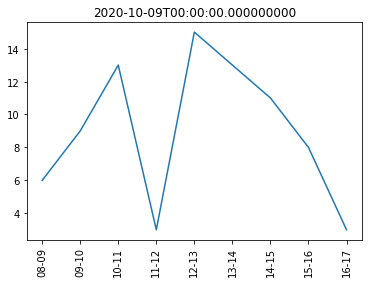

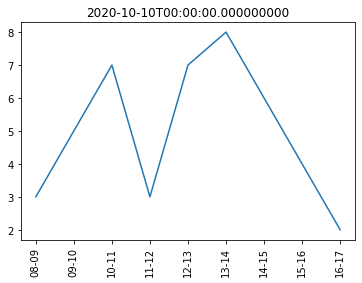

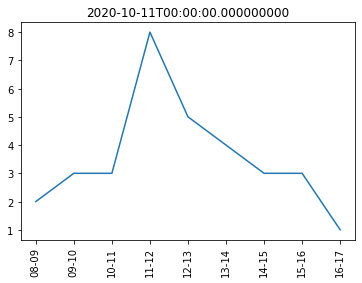

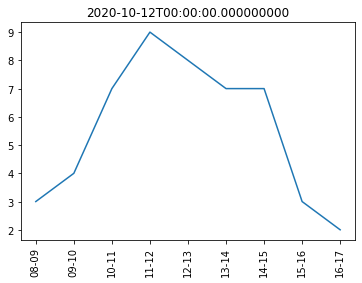

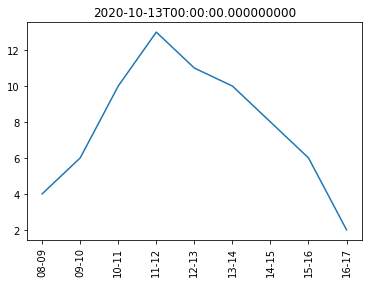

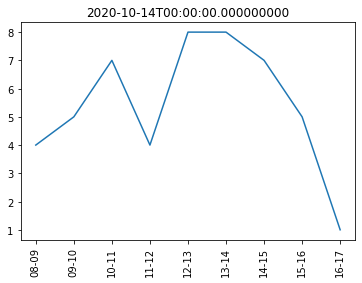

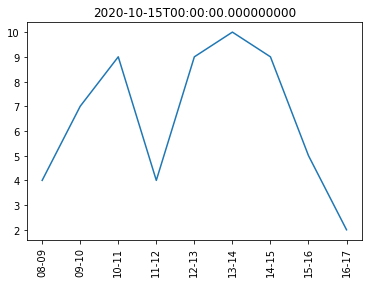

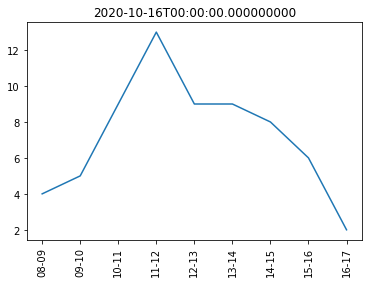

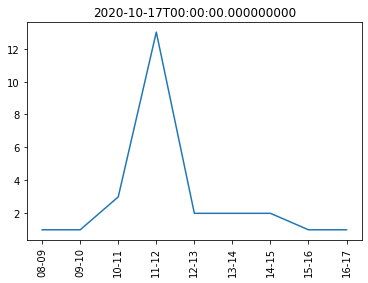

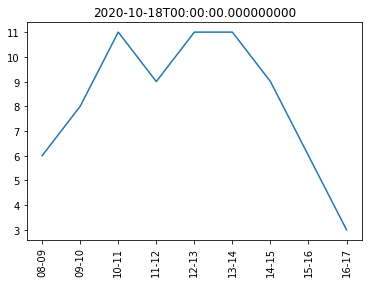

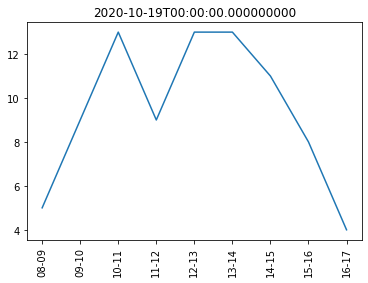

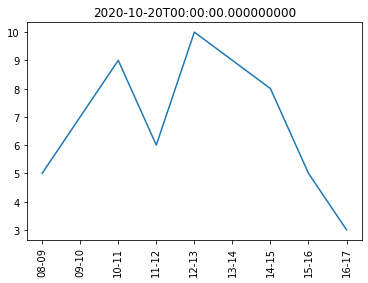

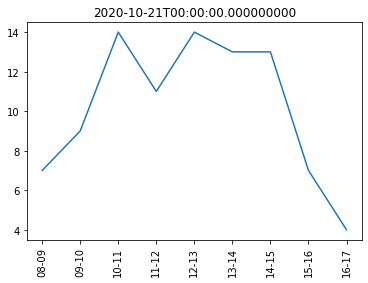

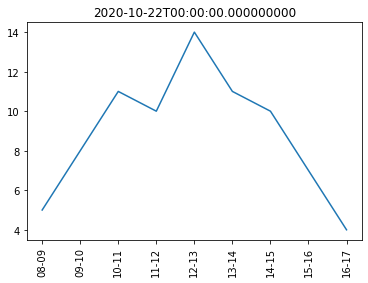

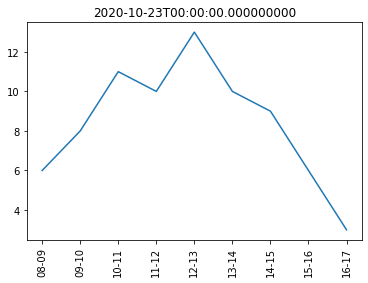

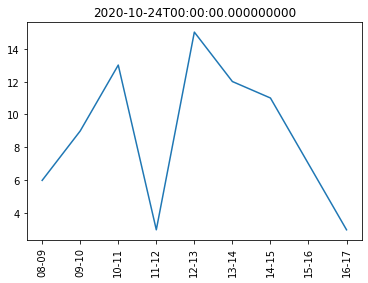

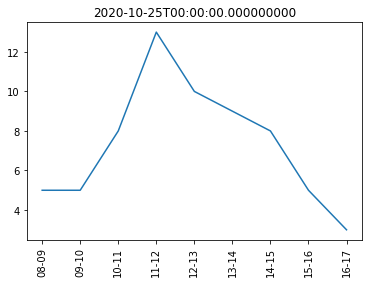

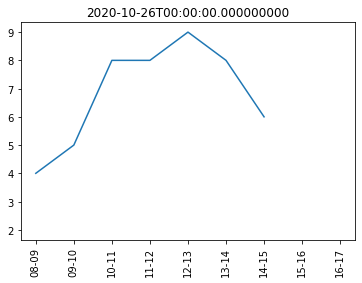

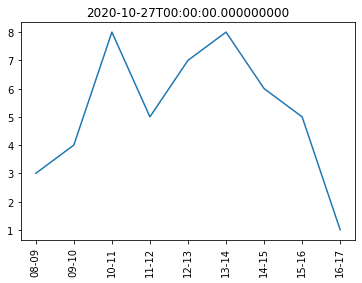

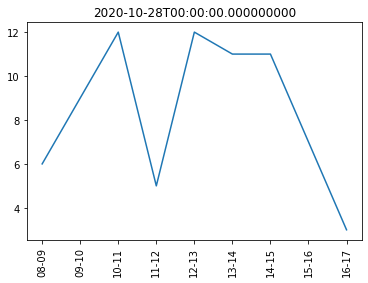

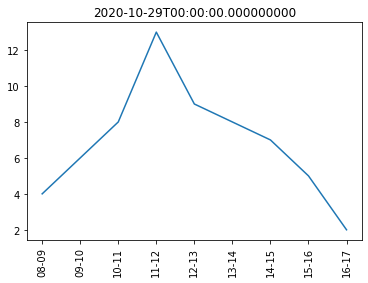

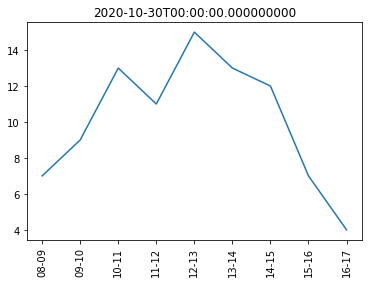

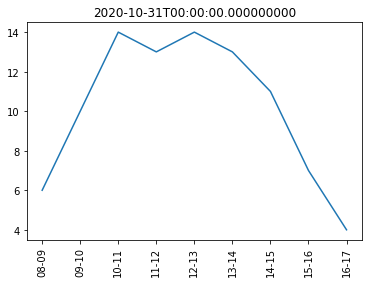

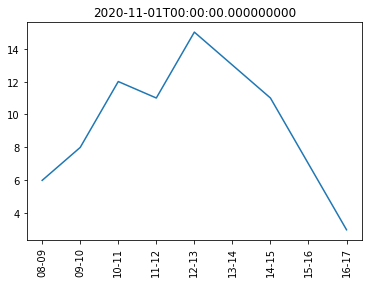

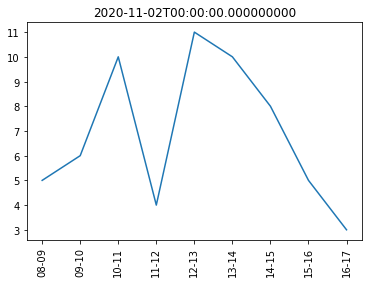

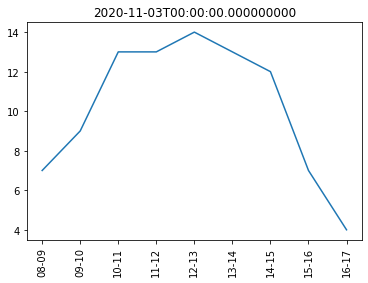

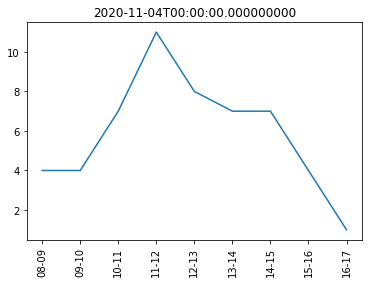

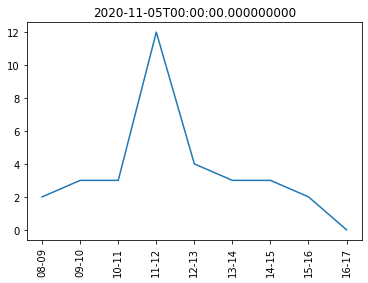

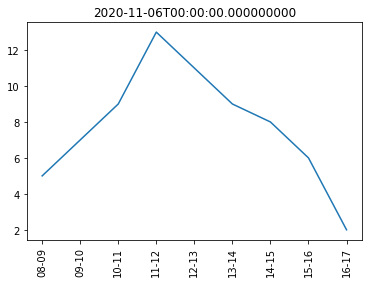

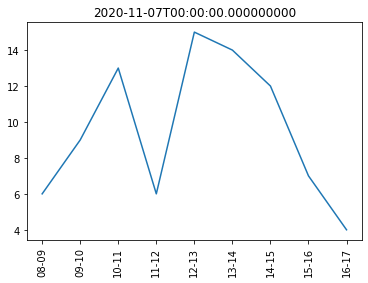

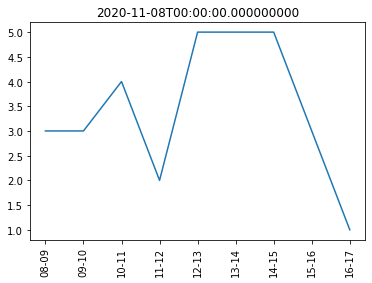

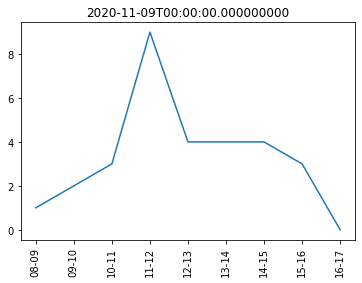

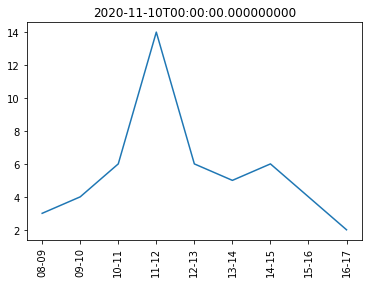

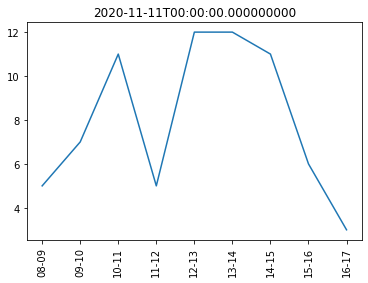

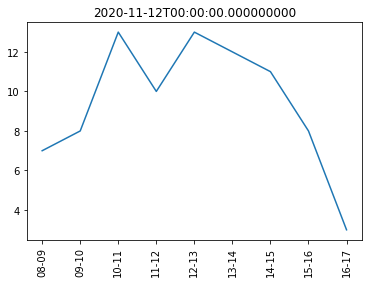

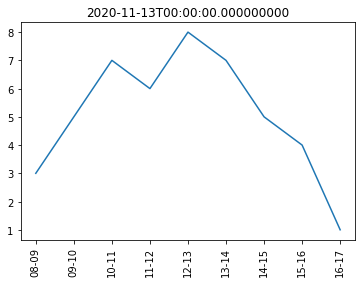

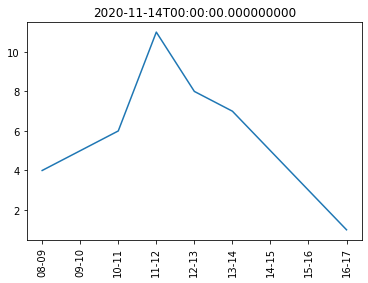

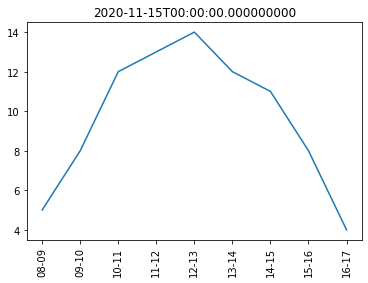

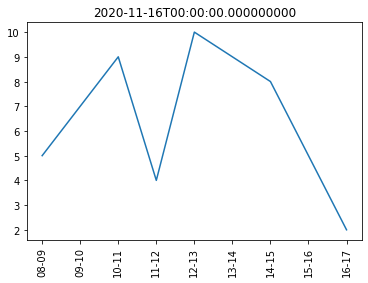

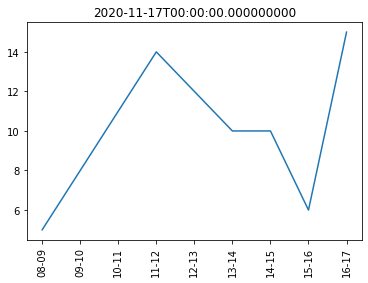

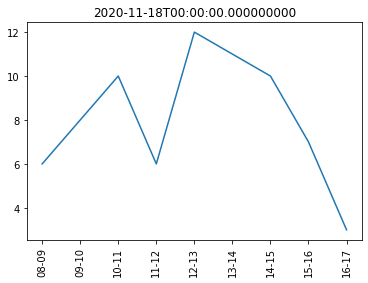

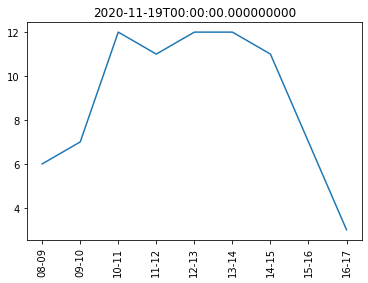

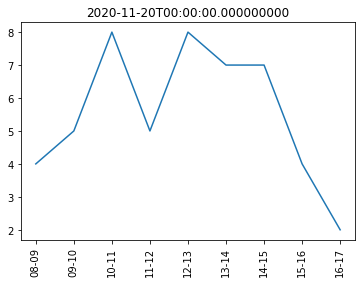

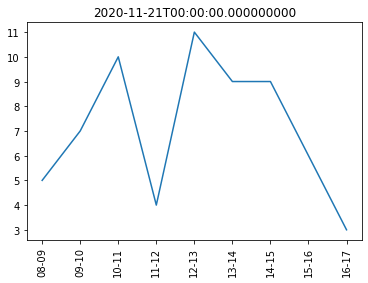

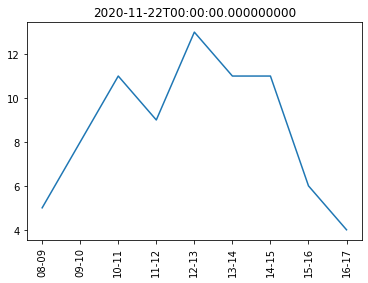

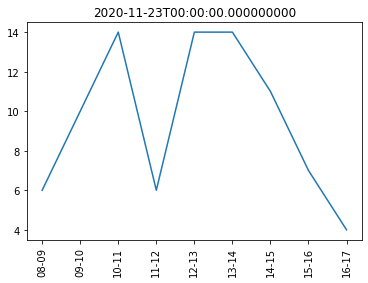

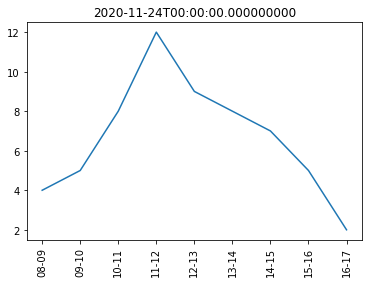

In [9]:
DatePoss = df.Date.unique()
Times = ['08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17']

for dt in DatePoss:
    BM = df.Date == dt
    
    wdf = df[BM]
    wdf.N_Cusotmers.plot()
    plt.xticks(wdf.index,Times, rotation=90)
    plt.title(dt)
    plt.show()

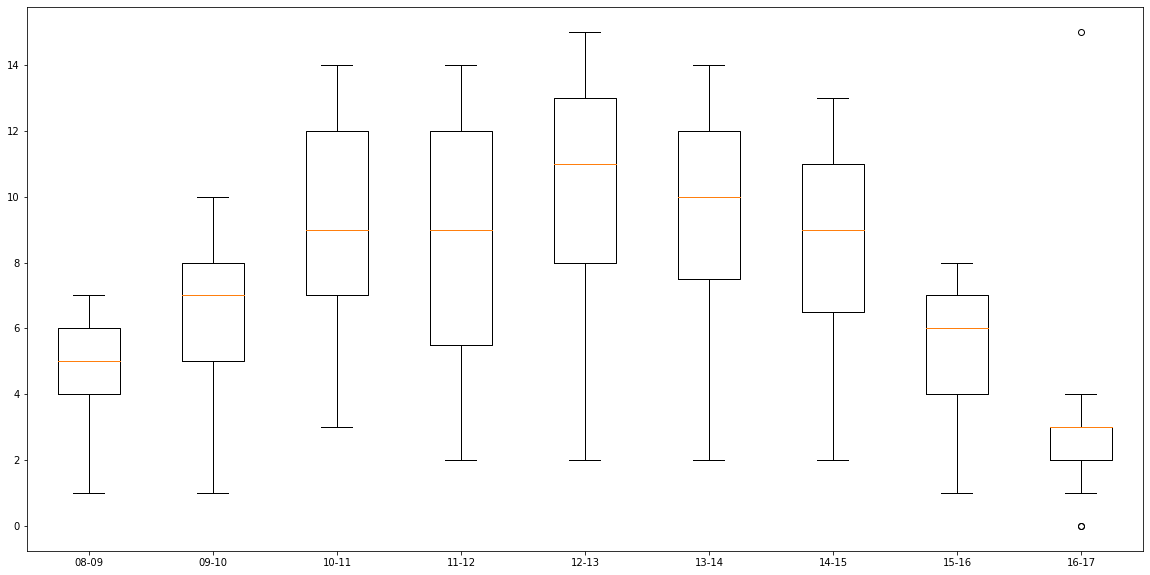

In [10]:
TimePoss = df.Time.unique()

# fill the nan temporarily for this visualization
wdf = df.interpolate(method='linear')

SS = pd.Series('', index = TimePoss)


for t in TimePoss:
    BM = wdf.Time == t
    SS[t] = wdf[BM].N_Cusotmers

plt.figure(figsize=(20,10))
plt.boxplot(SS)
plt.xticks(range(1,10), Times)
plt.show()

In [11]:
BM = (df.Time==17) & (df.N_Cusotmers>12)
df[BM]

,Date,Time,N_Cusotmers
431,2020-11-17,17,15.0


After investigation, it tuned out on 2020-11-17 at 4:25 a biking club made a half an hour stop for refreshment which was out of ordinary for the store. Therefore the data entry was not erroneous.

In [12]:
df.to_excel('Updated_CustomerEnteries.xlsx')